## Анализ исторических данных по продажам видеоигр и подготовка рекомендаций по планированию рекламных кампаний 2017 года на потенциально популярный продукт.

### Задача: проанализировать показатели продаж игр за весь предоставленный период, выявить закономерности чтобы

1) Выделить актуальные приставки на данный этап (текущее поколение), проверить показатели на них (продажи, рост-падение по отношению к конкурентам).

2) Посмотреть как отличаются продажи по этим платформам \ играм выпускаемым на них между регионами.

3) Проанализировать весь спектр (направления) игр за все время и посмотреть, как менялся интерес между жанрами по годам (графиками с заинтересованностью, так будет видно какие жанры остались в истории, а какие в топе).

4) Проверить есть ли разница по предпочтениям жанров в зависимости от платформ (выбранных ранее).

5) Вывести закономерности как те или иные жанры продавались в разных регионах, где выше зависимость (корелляция) предпочитает ли азиатский рынок jrpg, а европейцы гонки, америка "шутеры".

6) На основании полученных данных выдаем заключение на чем стоит сконцентрироваться магазину по консолям, жанрам, или сделать региональные страницы с разнонаправленными векторами, если будут выявлены предпочтения.

## 1. Анализ предоставленных данных

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np
import statsmodels.stats.api as sms

In [3]:
df_games = pd.read_csv('/datasets/games.csv')

In [4]:
df_games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### Выводы:
1. Видим пропуски в таких столбцах как Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating
2. Названия столбцов лучше привести к нижнему регистру
3.  Год релиза есть не везде, но примерно это можно установить по платформам, это нам может предоставить информацию как менялись вкусы покупателей со сменой поколений консолей (можем создать цифровой столбец с указанием поколения консолей, и уже по нему смотреть суммарные продажи по жанрам).
4. Столбцы Critic_Score, User_Score, Rating на данном этапе нам не понадобятся, однако мы запомним про пропуски в этих столбцах. Year_of_Release - потребуется перевести в int

## 2. Предобработка данных
### 2.1 Работа с именами столбцов

In [6]:
df_games.columns = df_games.columns.str.lower()
df_games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Привели все названия столбцов к нижнему регистру

### 2.2 Работа со столбцами name/genre

In [7]:
df_games.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [8]:
df_games['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [9]:
df_games['genre'] = df_games['genre'].fillna('unknown')

In [10]:
df_games['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', 'unknown'], dtype=object)

In [11]:
df_games.query('genre == "unknown"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,unknown,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,unknown,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Видим что пропуски в столбцах name и genge соответствуют друг другу.
Ключевое что здесь пропущенно - это жанр, без него невозможно будет корректно провести выборку, выстроить предпочтения, понять какие жанры в какие времена доминировали на рынке. Поскольку невозможно определить со 100% вероятностью, что за проекты представлены в этих строках, придется от них избавиться.

In [12]:
df_games = df_games[df_games.genre != 'unknown']
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null float64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Избавились от строк с пропусками в жанре и в названии игры.

### 2.3 Работа с типами данных в необходимых нам столбцах

In [13]:
df_games['year_of_release'] = df_games['year_of_release'].astype(pd.Int64Dtype())

Изменим тип данных для столбца year_of_release с float64 на int. Проверим изменения. 

In [14]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null Int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.5+ MB


In [15]:
df_games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [16]:
df_games['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [17]:
df_games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Поискав информацию в интернете выяснил что K-A и E это одно и тоже, просто K-A (Kids to Adult) использовалась до 1998 года. Создадим еще один столбцец, где добавим расшифровки, тем самым укрупним данные, убрав уже несуществующие рейтинги.

«EC» («Early childhood») — «Для детей младшего возраста» «E» («Everyone») (Old("K-A" ("Kids to Adults"))) — «Для всех» «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше» «T» («Teen») — «Подросткам» «M» («Mature») — «Для взрослых» «AO» («Adults Only 18+») — «Только для взрослых» «RP» («Rating Pending») — «Рейтинг ожидается»

###  2.4 Замена значений, добавление новых столбцов для работы с таблицей

In [18]:
# df_games['year_of_release'] = df_games['year_of_release'].fillna(0)
# df_games.info()
df_games['rating'].fillna('no_rating', inplace=True)
df_games['rating'].value_counts()

no_rating    6764
E            3990
T            2961
M            1563
E10+         1420
EC              8
RP              3
K-A             3
AO              1
Name: rating, dtype: int64

Создадим функцию с понятными названиями рейтингов и занесем их в отдельный столбец

In [19]:
def r_names(x):
    if x == 'EC':
        return 'Для детей младшего возраста'
    if x == 'E':
        return 'Для всех'
    if x == 'K-A':
        return 'Для всех'
    if x == 'E10+':
        return 'Для всех от 10 лет и старше'
    if x == 'T':
        return 'Подросткам'
    if x == 'M':
        return 'Для взрослых'
    if x == 'AO':
        return 'Только для взрослых'
    if x == 'RP':
        return 'Рейтинг ожидается'
    else:
        return 'Данных нет'
    
df_games['esrb_rus'] = df_games['rating'].apply(r_names)
df_games['esrb_rus'].value_counts()

Данных нет                     6764
Для всех                       3993
Подросткам                     2961
Для взрослых                   1563
Для всех от 10 лет и старше    1420
Для детей младшего возраста       8
Рейтинг ожидается                 3
Только для взрослых               1
Name: esrb_rus, dtype: int64

Добавим столбец с суммарной выручкой по регионам - total_sales

In [20]:
df_games['total_sales'] = df_games['na_sales'] + df_games['eu_sales'] + df_games['jp_sales'] + df_games['other_sales']
df_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,esrb_rus,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,Для всех,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no_rating,Данных нет,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,Для всех,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,Для всех,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no_rating,Данных нет,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,no_rating,Данных нет,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,no_rating,Данных нет,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,no_rating,Данных нет,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,no_rating,Данных нет,0.01


Предобработка выполнена. Ознакомились с данными, избавились от 2 строк, по которым невозможно будет провести анализ. Следующий шаг на пути - изучение данных. В первую очередь я буду проводить анализ. Я не желаю на данном этапе отклонять данные у которых нет даты релиза, эти данные можно будет использовать, чтобы посмотреть распределение по жанрам в зависимости от платформ. По поводу столбца рейтинга, на данном этапе дальнейший разбор проводиться не будет, посмотрим какие категории войдут после укрупнения данных, есть вероятность, что редкие значения отпадут сами собой.

## 3. Исследовательский анализ

Выясним распределение проектов, доходность по консолям, доходность годам. Установим средний период жизни одного поколения консоли, посмотрим как выглядит динамика развития рынка, проверим соответствует ли количество - качество, всегда ли большое количество проектов выпущенных в один год равно пибыли за год (продажам). Выберем текущее поколение платформ, посмотрим как они себя показывают на разных рынках, как конкурируют между собой.

### 3.1 Выведем количество проектов выпущенных по годам. Попробуем определить есть ли типичные резкие скачки в количестве, можно ли их связать с платформами.

In [21]:
df_console = df_games[['platform', 'year_of_release']]
df_console

,platform,year_of_release
0,Wii,2006
1,NES,1985
2,Wii,2008
3,Wii,2009
4,GB,1996
...,...,...
16710,PS3,2016
16711,X360,2006
16712,PSV,2016
16713,GBA,2003


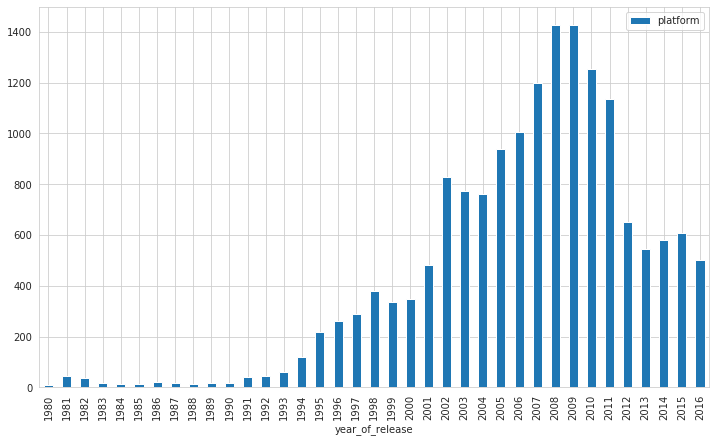

In [74]:
df_console.groupby('year_of_release').count().plot(kind='bar', figsize=(12, 7))

Условно можно поделить период на 1980-1993, 1994-2000, 2001-2005, 2006-2011, 2012-2016. Распределение по годам примерно соответствует появлению новых поколений консолей. Пиком количестива проектов является 2008-2009 г.

### 3.2 Анализ платформ, их популярности и доходов 

Теперь посмотрим на топовые платформы и проанализируем количество продаж и количество продукции по платформам за все года. Постараемся отследить динамику изменений.

Для начала проанализируем количество выпускаемой продукции на разные консоли. Явными лидерами являются консоли DS и PS2. Думаю что для полноты картины было бы неплохо взглянуть на суммарные продажи по консолям. Это позволит лучше понять устройство игрового рынка. 

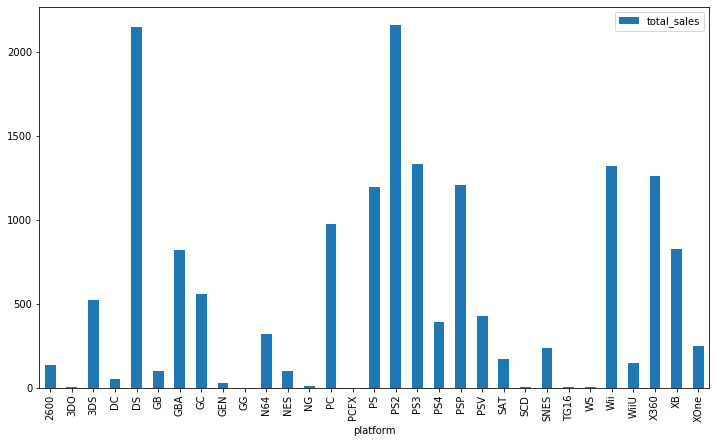

In [23]:
total_count = df_games.pivot_table(index='platform', values='total_sales', aggfunc='count')
total_count.plot.bar(figsize=(12, 7))

Взглянем на суммарные продажи по всем регионам для разных консолей

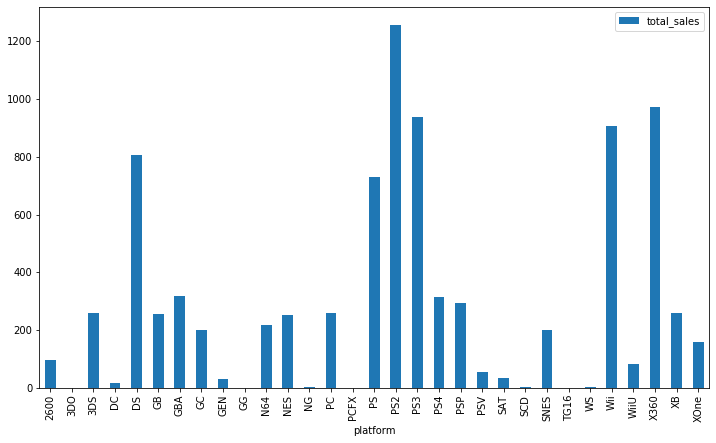

In [24]:
total_sum = df_games.pivot_table(index='platform', values='total_sales', aggfunc='sum')
total_sum.plot.bar(figsize=(12, 7))

Построив график для платформ и просуммировав значения выручки по всем регионам видим, что далеко не для всех платформ количество вышедших игр связано с высокими показателями выручки. 

Теперь взглянем на количество выпущенной продукции по консолям за каждый год

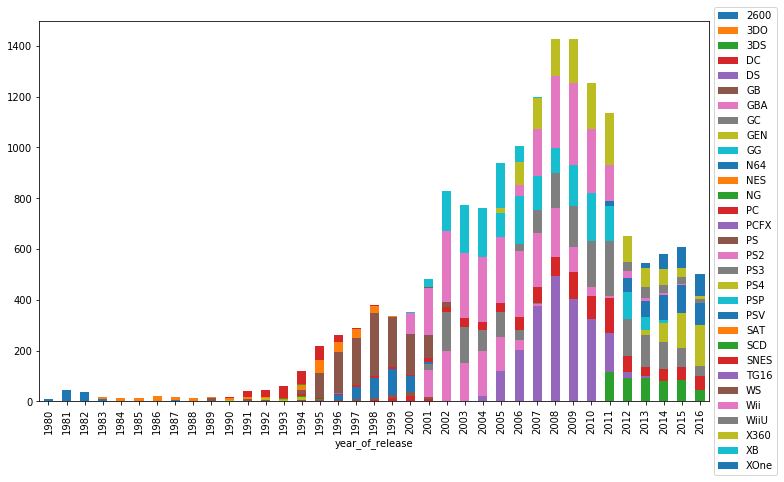

In [25]:
years_count = df_games.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='count')
years_count.plot.bar(stacked=True, figsize=(12, 7))
plt.legend(bbox_to_anchor=(1, 1.05))

И на выручку от продаж продукции по консолям за каждый год

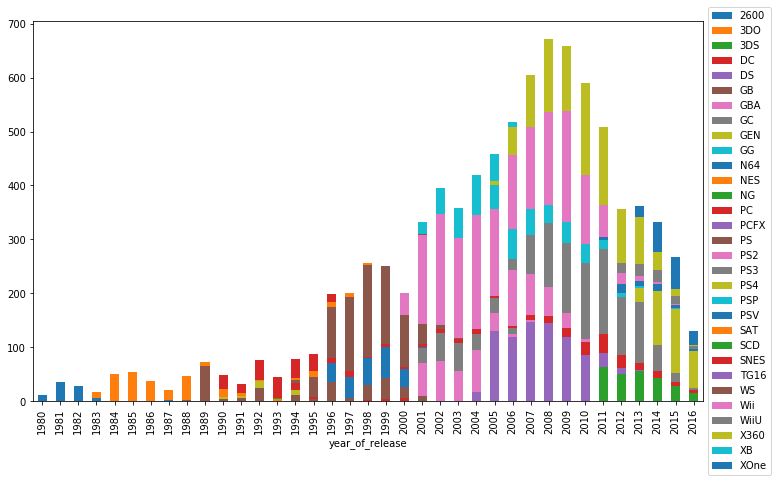

In [26]:
years_sum = df_games.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
years_sum.plot.bar(stacked=True, figsize=(12, 7))
plt.legend(bbox_to_anchor=(1, 1.05))

Наблюдаем ту же тенденцию. Все проанализированные графики говорят нам о том, что разницу по продажам и выпушенной продукции необходимо учитывать при планировании. А так же есть смысл разобраться в причинах разницы этих показателей и принять меры по корректированию показателей в ту или иную сторону. Об этом необходимо помнить.
Помимо этого по графикам видно, что "срок жизни" консоли обычно составляет 5-6 лет. От релиза до полной ее замены другой, более новой, консолью. 

### 3.3 Анализ регионов и их предпочтений

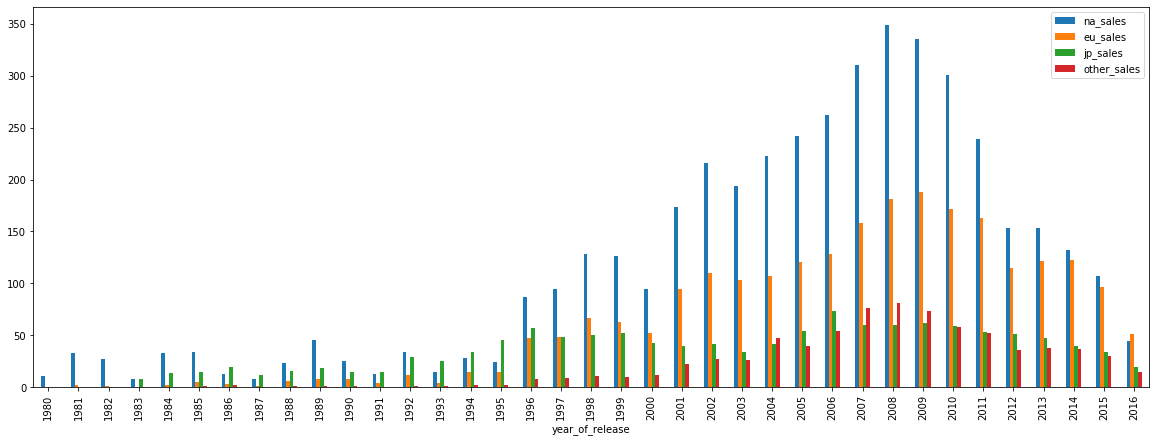

In [27]:
# top_platform = df_games.query('platform in ("PSP", "PS3", "PS", "XB", "X360", "Wii", "DS", "GBA", "PC")')
# top_platform
regions = df_games[['platform', 'year_of_release'] + ['na_sales'] + ['eu_sales'] + ['jp_sales'] + ['other_sales']]
regions.groupby('year_of_release').sum().plot(kind='bar', figsize=(20, 7))

Рост продаж и количества проектов напрямую связан с появлением новых платформ, не всегда наблюдается рост (это можно наблюдать на последнем отрезке 2012-2016.), но думаю что это скорее связано с общим уменьшением проектов на платформы нового поколения, чем с падением рынка вызванным снижением покупательской активности. Не стоит забывать что уменьшение количества проектов в первую очередь связано с увеличением сроков на их производство.
На всем предоставленном нам периоде распределения равномерны. Бесспорным лидером по потреблению является Северная Америка, следом Европа ( в среднем с отставанием в половину от показателя СА), и 3-4 место попеременно занимает Японии и остальной мир.

### 3.4 Изучение распределения продаж по данным за последние годы. Выделение тестовой группы

Как мы уже выяснили в пункте 3.2, безусловным лидером в количестве производимой продукции и в доходах от продаж является компания производитель приставок PlayStation разных поколений. Последнее поколение самых популярных приставок - PS и Xbox вышли в 2013 году. Делать прогноз необходимо по самым актуальным данным, поэтому не вижу смысла учитывать популярность игр на уже давно не используемых приставках.
Предварительно выберем 5 платформ PS4, XOne, PSV, 3DS, PC.

Сформируем новую таблицу. Отбросим неактуальные данные до 2013 года.

In [28]:
new_games = df_games.query('year_of_release >= 2013')
new_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,esrb_rus,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,Для взрослых,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,Для взрослых,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no_rating,Данных нет,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,no_rating,Данных нет,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,Для взрослых,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,no_rating,Данных нет,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,no_rating,Данных нет,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,no_rating,Данных нет,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,no_rating,Данных нет,0.01


In [29]:
new_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 13 columns):
name               2233 non-null object
platform           2233 non-null object
year_of_release    2233 non-null Int64
genre              2233 non-null object
na_sales           2233 non-null float64
eu_sales           2233 non-null float64
jp_sales           2233 non-null float64
other_sales        2233 non-null float64
critic_score       991 non-null float64
user_score         1300 non-null object
rating             2233 non-null object
esrb_rus           2233 non-null object
total_sales        2233 non-null float64
dtypes: Int64(1), float64(6), object(6)
memory usage: 246.4+ KB


Мы помним о пропущенных значениях в рейтингах от критиков и от пользователей. На данном этапе очистку/замену нулевых значений проводить не будем. Пока что это нам не требуется

Проанализируем данные по популярности платформ за период 2013-2016г. 

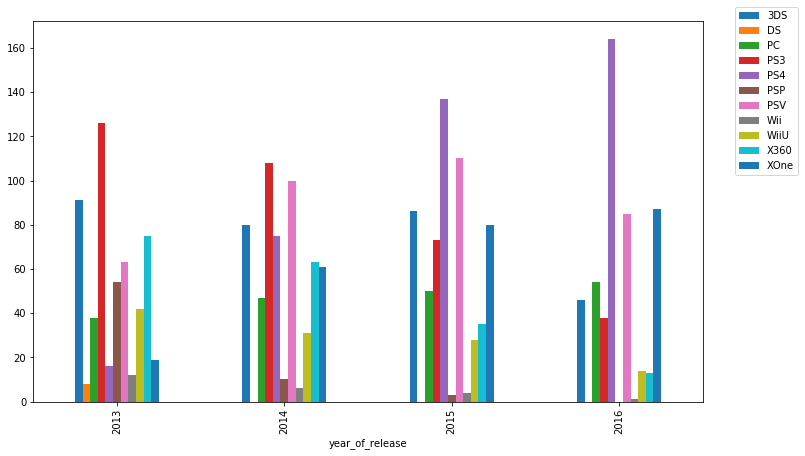

In [30]:
df_change = new_games.pivot_table(index='year_of_release',columns='platform', values='total_sales', aggfunc='count')
df_change.plot.bar(figsize=(12, 7))
plt.legend(bbox_to_anchor=(1.15, 1.05))

Из всего многообразия используемых платформ выберем только те, которые считаем перспективными и интерес к которым растет или не уменьшается. Такими платформами являются 3DS, PS4, PC, PSV, WiiU, XOne. 3DS и PSV выбираем потому, что с 2013 по 2015 г виден рост, однако в 2016 наблюдаем падение. Но мы помним, что данные за 2016 г. могут быть неполными, поэтому есть смысл включить в список и эти консоли.

Теперь сформируем новую таблицу с уже выбранными платформами

In [31]:
new_consoles = df_games.query('platform in ("3DS", "PS4", "PC", "PSV", "WiiU", "XOne") and year_of_release >= 2013')

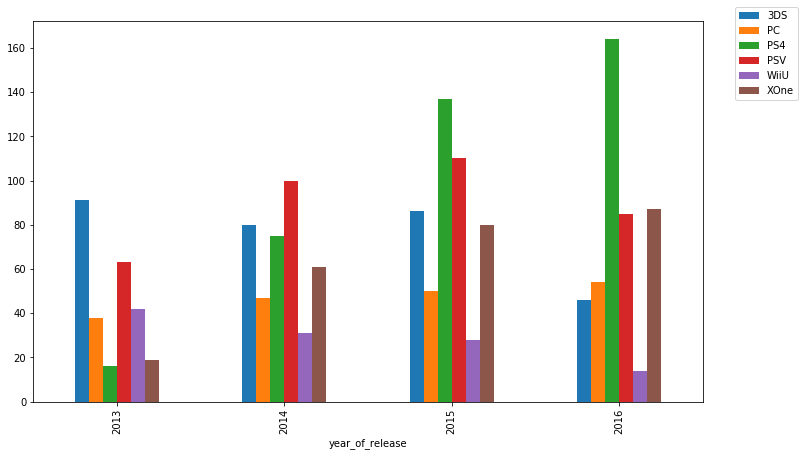

In [32]:
new_df_change = new_consoles.pivot_table(index='year_of_release',columns='platform', values='total_sales', aggfunc='count')
new_df_change.plot.bar(figsize=(12, 7))
plt.legend(bbox_to_anchor=(1.15, 1.05))

Посмотрим на финансовый успех выбранных платформ в период с 2013 по 2016г.

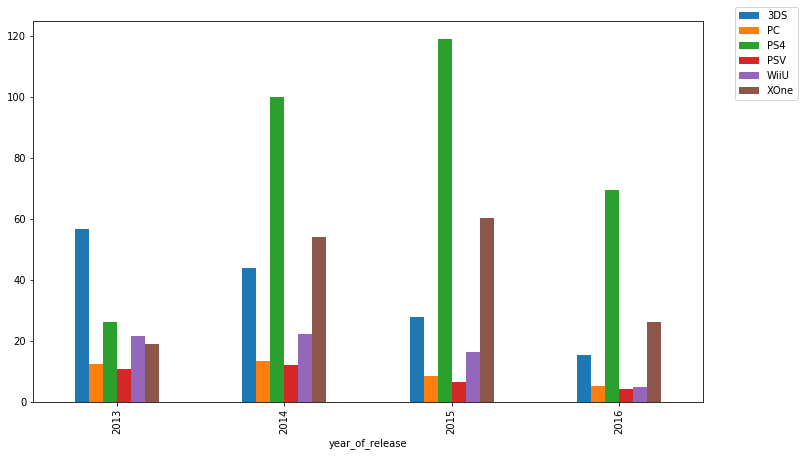

In [33]:
(new_consoles
 .pivot_table(index='year_of_release',columns='platform', values='total_sales', aggfunc='sum')
 .plot.bar(figsize=(12, 7)))
plt.legend(bbox_to_anchor=(1.15, 1.05))

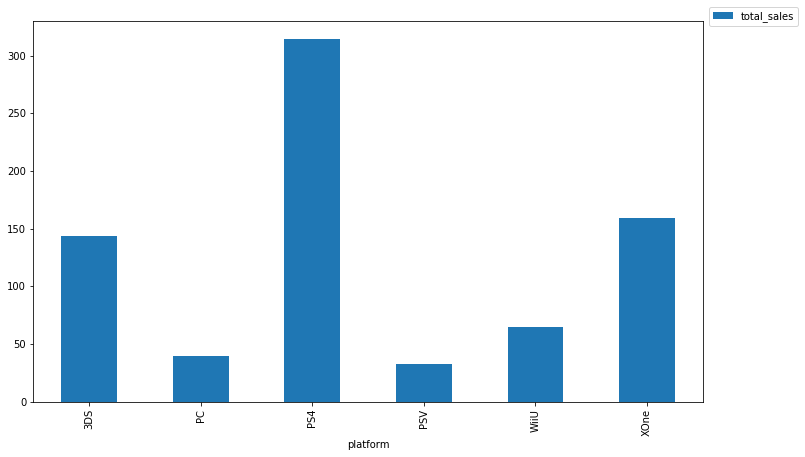

In [34]:
(new_consoles
 .pivot_table(index='platform', values='total_sales', aggfunc='sum')
 .plot.bar(figsize=(12, 7)))
plt.legend(bbox_to_anchor=(1.15, 1.05))

По общему количеству продаж на платформы, 6-ка формируется такой: 1 - PS4 2 - XOne 3 - 3DS 4 - WiiU 5 - PC 6 - PSV

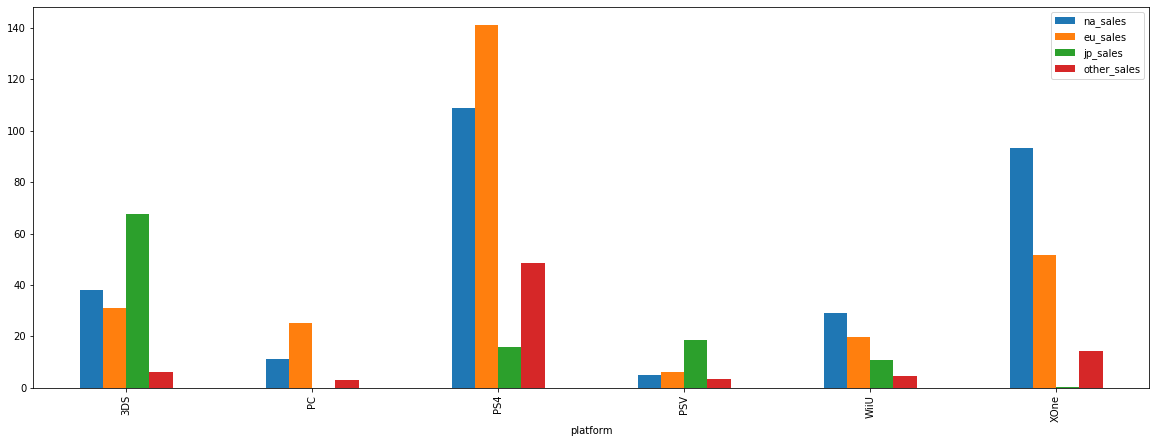

In [35]:
new_regions = new_consoles[['platform', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales']]
new_regions.groupby('platform').sum().plot(kind='bar', figsize=(20, 7))

А вот с этой точки зрения данные неоднородны. Проведем аналогию слева направо, как мы видим график. 3DS - половина всего рынка приходится на маленькую Японию, меньше всего распространена по остальному миру. PC - Самое большое распространение в Европе и полное отсутсвие на территории Японии. PS4 - Больше всего продаж приходится на Европу, самые маленькие на территорию Японии. PSV - опять мобильная платформа, больше всего распространена на территории Японии. WiiU - равномерно затухающие продажи, которые можно сопоставить с общим положением дохода от всей индустрии. XOne - Больше всего распроcтранена на территории Северной Америки (как продукция Microsoft), практически не представлена на родине ее прямого конкурента Sony.

### 3.5 Построим график по глобальным продажам каждой игры и разбивкой по платформам.

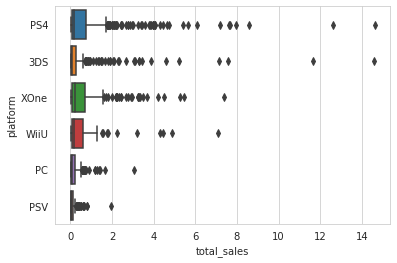

In [36]:
sns.set_style('whitegrid')
sns.boxplot(x='total_sales', y='platform', data=new_consoles)

Абсолютно неинформативно, но из графика видно, что львиная доля подаж приходится на PS4 и XOne.

Посмотрим сколько в среднем приходится продаж на каждого участника рынка, по данному показателю практически идентичны показатели Европу и Северной Америки

In [37]:
new_regions.groupby('platform').sum().mean()

na_sales       47.570000
eu_sales       45.825000
jp_sales       18.930000
other_sales    13.301667
dtype: float64

Игроки из какого региона, чаще всего приобретают игры

In [38]:
new_regions.groupby('platform').sum().median()

na_sales       33.705
eu_sales       28.160
jp_sales       13.420
other_sales     5.485
dtype: float64

### 3.6 Влиние рейтингов на продажи

Проверим, как влияют продажи в рамках одной платформы в зависимости от отзывов критиков и самих пользователей. Для этой части мы модифицируем нашу таблицу, убрав отсутстующие значения.

In [39]:
new_consoles

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,esrb_rus,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no_rating,Данных нет,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,no_rating,Данных нет,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,Для взрослых,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,no_rating,Данных нет,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,Для всех,8.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16699,The Longest 5 Minutes,PSV,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,no_rating,Данных нет,0.01
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,no_rating,Данных нет,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,no_rating,Данных нет,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,no_rating,Данных нет,0.01


In [40]:
fix_df = new_consoles[['platform', 'genre', 'critic_score', 'user_score', 'rating', 'na_sales', 'eu_sales', 'jp_sales', 'total_sales']]
fix_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1604 entries, 31 to 16714
Data columns (total 9 columns):
platform        1604 non-null object
genre           1604 non-null object
critic_score    788 non-null float64
user_score      912 non-null object
rating          1604 non-null object
na_sales        1604 non-null float64
eu_sales        1604 non-null float64
jp_sales        1604 non-null float64
total_sales     1604 non-null float64
dtypes: float64(5), object(4)
memory usage: 205.3+ KB


Дропаем все NaN, поскольку нам нужно проверить взаимосвязь значений, а так же убираем формулировку tbd - рейтинг ожидается. Меняем тип данных столбца user_score на float64

In [41]:
fix_df.dropna(inplace=True)
fix_df = fix_df[fix_df.user_score != 'tbd']
fix_df['user_score'] = fix_df['user_score'].astype('float64')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [42]:
fix_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 774 entries, 42 to 16692
Data columns (total 9 columns):
platform        774 non-null object
genre           774 non-null object
critic_score    774 non-null float64
user_score      774 non-null float64
rating          774 non-null object
na_sales        774 non-null float64
eu_sales        774 non-null float64
jp_sales        774 non-null float64
total_sales     774 non-null float64
dtypes: float64(6), object(3)
memory usage: 60.5+ KB


Теперь вид данных нас устраивает

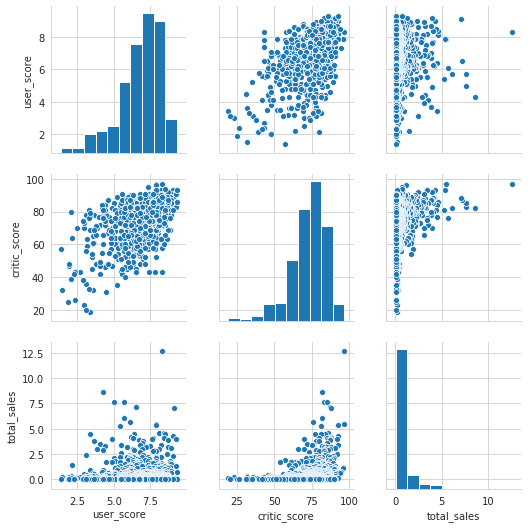

In [43]:
cols = ['user_score', 'critic_score', 'total_sales']
sns.pairplot(fix_df[cols])

In [44]:
fix_df[cols].corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.476465,0.000857
critic_score,0.476465,1.000000,0.324278
total_sales,0.000857,0.324278,1.000000


Согласно полученным данным рейтинги игроков не могут влиять на продажи игр, зависимость крайне слабая. Однако рослеживается достаточно сильная зависимость рейтингов пользовательского от критиков. Вполне возможно что это связано с тем, что авторитет критиков достаточно высок, поэтому пользователи ориентируются на мнение критиков и формируют свою точку зрения под влиянием точки зрения критиков. Помимо этого видим зависимость продаж от рейтингов критиков. Думаю, что это опять же связано с авторитетным мнением критиков, на которое ориентируются пользователи. Как видно из всех зависимостей, критики являются самыми влиятельными людьми. Они могут повлиять как на пользовательское мнение, так и на вытикающую отсюда выручку от продаж.


### 3.7 Посмотрим как распределены продажи по жанрам в выделенном нами сегменте (поколении консолей)

Таблица на основе которой будем изучать распределение продаж по жанрам

In [45]:
new_consoles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1604 entries, 31 to 16714
Data columns (total 13 columns):
name               1604 non-null object
platform           1604 non-null object
year_of_release    1604 non-null Int64
genre              1604 non-null object
na_sales           1604 non-null float64
eu_sales           1604 non-null float64
jp_sales           1604 non-null float64
other_sales        1604 non-null float64
critic_score       788 non-null float64
user_score         912 non-null object
rating             1604 non-null object
esrb_rus           1604 non-null object
total_sales        1604 non-null float64
dtypes: Int64(1), float64(6), object(6)
memory usage: 257.0+ KB


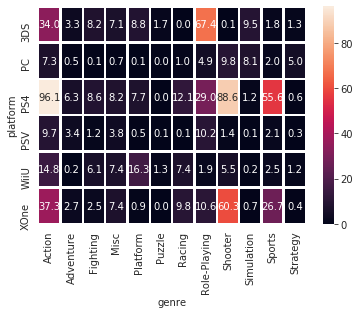

In [46]:
genre_sales = (new_consoles
               .pivot_table(index='platform', columns='genre', values='total_sales', aggfunc=sum)
               .fillna(0)
               .applymap(float))
sns.heatmap(genre_sales, annot=True, fmt=".1f", linewidths=1.5) 

In [47]:
genre_sales.sum().sort_values(ascending=False)

genre
Action          199.18
Shooter         165.71
Role-Playing    123.94
Sports           90.67
Misc             34.66
Platform         34.22
Racing           30.36
Fighting         26.69
Simulation       19.81
Adventure        16.48
Strategy          8.91
Puzzle            3.13
dtype: float64

После анализа можно сделать вывод, что лидерами по общим продажам являются жанры Action, Shooter и Role-Playing. Распределение этих жанров по платформам можно более подробно изучить по тепловой карте. Далее попробуем поглядеть как предпочтения пользователей по жанрам меняются в зависимости от региона.

### 4 Портрет пользователя каждого региона

#### 4.1 Северная Америка

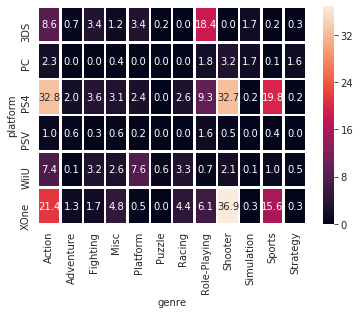

In [48]:
genre_sales_na = (new_consoles
               .pivot_table(index='platform', columns='genre', values='na_sales', aggfunc=sum)
               .fillna(0)
               .applymap(float))
sns.heatmap(genre_sales_na, annot=True, fmt=".1f", linewidths=1.5) 

In [49]:
genre_sales_na.sum().sort_values(ascending=False)

genre
Shooter         75.37
Action          73.43
Role-Playing    37.92
Sports          37.09
Platform        14.18
Misc            12.69
Fighting        12.10
Racing          10.29
Adventure        4.57
Simulation       4.08
Strategy         2.87
Puzzle           0.83
dtype: float64

Североамериканский пользователь - данный представитель предпочитает проекты на PS4 или XOne. Предпочитает проекты в стиле Action, Shooter, Sports. Также в домах данных пользователей есть WiiU и 3DS, но особо дохода они не принесут, распространение очень мало.

#### 4.2 Европа

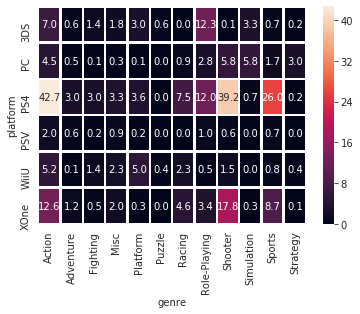

In [50]:
genre_sales_eu = (new_consoles
               .pivot_table(index='platform', columns='genre', values='eu_sales', aggfunc=sum)
               .fillna(0)
               .applymap(float))
sns.heatmap(genre_sales_eu, annot=True, fmt=".1f", linewidths=1.5) 

In [51]:
genre_sales_eu.sum().sort_values(ascending=False)

genre
Action          73.96
Shooter         64.89
Sports          38.63
Role-Playing    32.00
Racing          15.18
Platform        12.16
Misc            10.61
Simulation      10.17
Fighting         6.58
Adventure        5.88
Strategy         3.89
Puzzle           1.00
dtype: float64

Европейский пользователь - данный представитель предпочитает проекты PS4, она имеет большее распространение на территории, превосходя в 2 раза продажи на этой территории своего конкурента XOne. Тройка самых популярных жанров - Action, Shooter, Sports. Самую большую выручку будут приносить именно эти жанры и именно для пратформы PS4.

#### 4.3 Япония

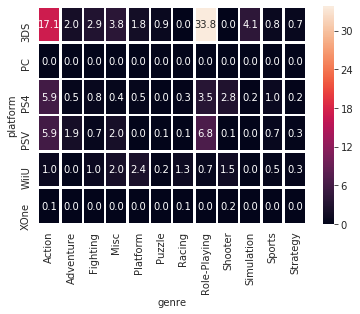

In [52]:
genre_sales_jp = (new_consoles
               .pivot_table(index='platform', columns='genre', values='jp_sales', aggfunc=sum)
               .fillna(0)
               .applymap(float))
sns.heatmap(genre_sales_jp, annot=True, fmt=".1f", linewidths=1.5) 

In [53]:
genre_sales_jp.sum().sort_values(ascending=False)

genre
Role-Playing    44.84
Action          29.87
Misc             8.27
Fighting         5.33
Platform         4.75
Shooter          4.56
Adventure        4.37
Simulation       4.29
Sports           3.05
Racing           1.68
Strategy         1.43
Puzzle           1.14
dtype: float64

Первое, что бросается в глаза - полное отсутсвие проектов от прямого конкурента SONY. Продукция XOne на данной территории совершенно не интересна игрокам. Из предыдущих исследований мы точно можем сказать, что в этом регионе самой популярной консолью является 3DS, а значит производителям игр нужно делать ствавку именно на игры под эту консоль. Жанровые предпочтения Японии не слишком разнообразны. С большим отрывом выигрывают жанры Role-Playing и Action. Именно эти жанры для платформы 3DS будут коммерчески успешными в Японии.

#### 4.4 Узнаем влияет ли рейтинг ESRB на продажи в каждом отдельном регионе

In [54]:
esrb = new_consoles[['na_sales', 'eu_sales', 'jp_sales', 'esrb_rus']]
esrb[esrb['esrb_rus'] != 'Данных нет'].groupby('esrb_rus').corr()

na_sales  eu_sales  jp_sales
esrb_rus                                                          
Для взрослых                na_sales  1.000000  0.820077  0.337268
                            eu_sales  0.820077  1.000000  0.503271
                            jp_sales  0.337268  0.503271  1.000000
Для всех                    na_sales  1.000000  0.420177  0.486041
                            eu_sales  0.420177  1.000000  0.258585
                            jp_sales  0.486041  0.258585  1.000000
Для всех от 10 лет и старше na_sales  1.000000  0.636826  0.388309
                            eu_sales  0.636826  1.000000  0.487481
                            jp_sales  0.388309  0.487481  1.000000
Подросткам                  na_sales  1.000000  0.871942  0.109108
                            eu_sales  0.871942  1.000000  0.091223
                            jp_sales  0.109108  0.091223  1.000000

In [55]:
esrb[esrb['esrb_rus'] != 'Данных нет'].groupby('esrb_rus').sum()

,na_sales,eu_sales,jp_sales
esrb_rus,,,
Для взрослых,97.05,94.51,8.17
Для всех,52.37,58.00,13.26
Для всех от 10 лет и старше,32.25,26.30,5.66
Подросткам,35.07,32.60,13.52


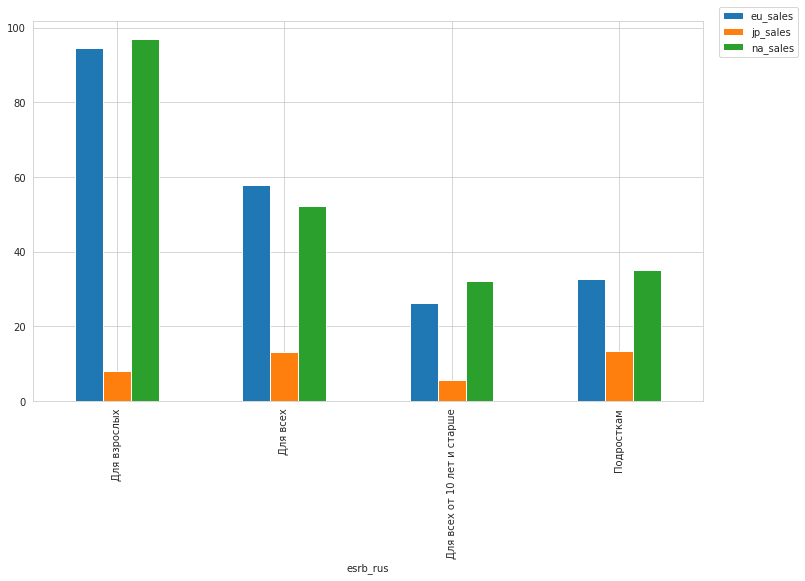

In [56]:
(esrb[esrb['esrb_rus'] != 'Данных нет']
 .pivot_table(index='esrb_rus',values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
 .plot.bar(figsize=(12, 7)))
plt.legend(bbox_to_anchor=(1.15, 1.05))

На основании данных представленных выше, можно с уверенностью сказать что рейтинг влияет на распределение по пользователям из разных точек мира. Так для Японии характерен перекос на игры для подростков и всех возрастов, тогда как Северная Америка и Европа в подавляющей своей массе представлена игроками старше 18 лет, с играми отличающимися повышенной жестокостью.

### 5. Проверка гипотез

Проверка гипотрезы 1.
- Нулевая гипотеза: средние пользовательские рейтинги для платформ XOne и PC одинаковы или различаются не более чем на 5%
- Альтернативная гипотеза: средние пользовательские рейтинги для платформ XOne и PC НЕ ОДИНАКОВЫ и различаются более чем на 5%

Для дальнейших расчетов я решил использовать "Гипотезу о равенстве средних для зависимых (парных) выборок". Почему ее - у меня идентичные показатели по параметрам (сравниваю подобное с подобным), едиственное различие - платформа на которую выпущен проект.

In [57]:
df_pc = fix_df.query('platform == "PC"')
df_pc = df_pc['user_score'].sample(n=100, random_state=1)
df_pc

13221    3.4
14737    4.8
8119     3.5
13559    4.3
13092    6.5
        ... 
16120    6.3
13941    7.1
9292     3.0
3212     6.5
11495    5.8
Name: user_score, Length: 100, dtype: float64

In [58]:
df_xone = fix_df.query('platform == "XOne"')
df_xone = df_xone['user_score'].sample(n=100, random_state=1)
df_xone

1948     5.6
2280     5.7
16264    8.1
3630     5.1
13561    6.0
        ... 
1615     5.9
5321     6.6
12537    6.9
16660    6.7
1386     8.2
Name: user_score, Length: 100, dtype: float64

Стандартное отклонение задаю на 5%

In [59]:
alpha = .05

results = st.ttest_ind(
    df_pc, 
    df_xone)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):

    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.43417109694476885
Не получилось отвергнуть нулевую гипотезу


Теперь стоит проверить (подтвердить) нашу гипотезу путем сравнения доверительных интервалов. Считаем доверительные интервалы и смотрим пересекаются ли их значения.

In [60]:
sms.DescrStatsW(df_pc).tconfint_mean() 

(5.859148741160608, 6.578851258839395)

In [61]:
sms.DescrStatsW(df_xone).tconfint_mean() 

(6.116218505168431, 6.68378149483157)

Доверительные интервалы пересекаются.
- ВЫВОД: Нулевая гипотеза подтверждена.

Проверка гипотрезы 2.
- Нулевая гипотеза: средние пользовательские рейтинги для жанров Action и Sports одинаковы или различаются не более чем на 5%
- Альтернативная гипотеза: средние пользовательские рейтинги для жанров Action и Sports НЕ ОДИНАКОВЫ и различаются более чем на 5%

In [62]:
df_action = fix_df.query('genre == "Action"')
df_action = df_action['user_score'].sample(n=80, random_state=1)
df_action

4148     5.9
16692    7.6
13941    7.1
15175    7.9
5988     5.7
        ... 
3606     6.8
11059    6.4
9814     6.0
16652    8.5
5926     7.0
Name: user_score, Length: 80, dtype: float64

In [63]:
df_sports = fix_df.query('genre == "Sports"')
df_sports = df_sports['user_score'].sample(n=80, random_state=1)
df_sports

7575     4.4
10343    6.2
6487     5.5
6854     4.0
12834    8.2
        ... 
2247     7.8
469      6.3
10358    7.0
12756    1.9
94       5.0
Name: user_score, Length: 80, dtype: float64

Стандартное отклонение задаю на 5%

In [64]:
results = st.ttest_ind(
    df_action, 
    df_sports)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):

    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.0370073807117863e-07
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу. Сравним доверительные интервалы. Считаем доверительные интервалы и смотрим пересекаются ли их значения.

In [65]:
sms.DescrStatsW(df_action).tconfint_mean() 

(6.675165512022863, 7.187334487977138)

In [66]:
sms.DescrStatsW(df_sports).tconfint_mean() 

(5.42778556058132, 6.08971443941868)

Доверительные интервалы не имеют точек вхождения \ соприкосновения между собой. Вывод: Пользовательские рейтинги для жанров Action и Sport различаются, средний балл для Action выше.

### 6. Общие выводы

#### 1. Ориентироваться стоит на Североамериканский и Европейский рынок. Игроки этих регионов наиболее активны и проекты ориентированные именно на эти регионы смогут стать наиболее упешными

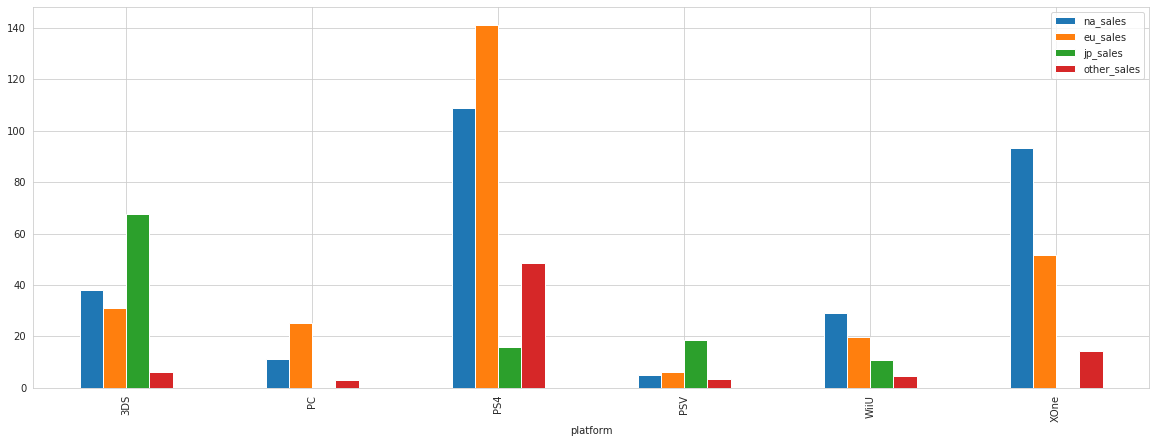

In [67]:
new_regions = new_consoles[['platform', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales']]
new_regions.groupby('platform').sum().plot(kind='bar', figsize=(20, 7))

#### 2. Ориентироваться стоит в первую очередь на продукцию для PS4, во вторую на XOne. Эти консоли являются самыми распространенными, представлены почти на всех рынках. 3 место отдадим 3DS, однако эта платформа наиболее популярна только в Японии, а этот регион не может гарантировать высокий коммерческий успех и окупаемость новых проектов.

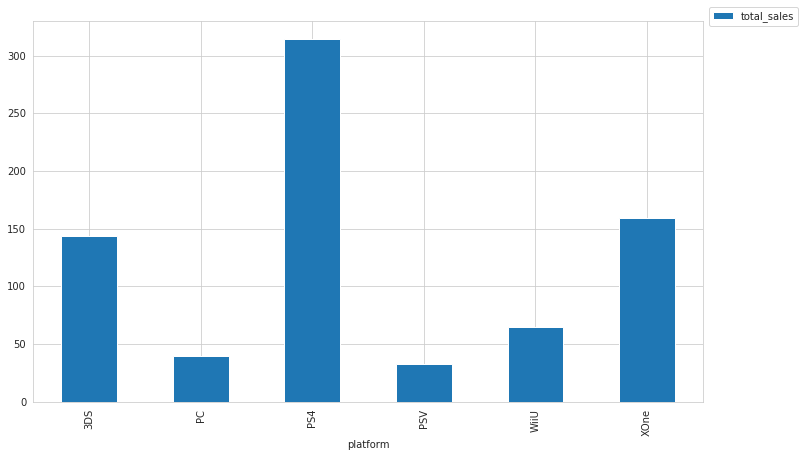

In [68]:
(new_consoles
 .pivot_table(index='platform', values='total_sales', aggfunc='sum')
 .plot.bar(figsize=(12, 7)))
plt.legend(bbox_to_anchor=(1.15, 1.05))

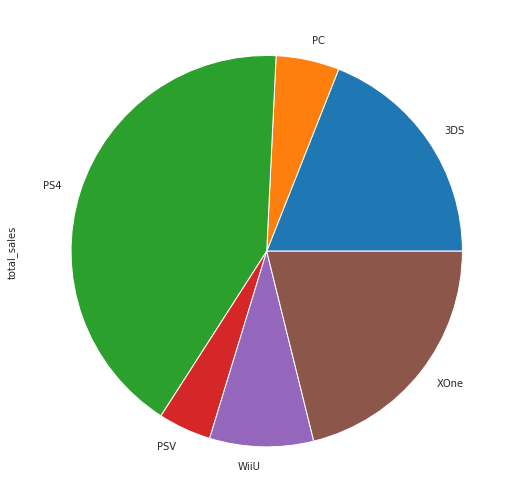

In [69]:
new_consoles.groupby('platform')['total_sales'].sum().plot(kind = 'pie',figsize = (9,9))

#### 3. Предпочтения по жанрам продуктов внезависимости от консоли и рынка (общие тенденции)

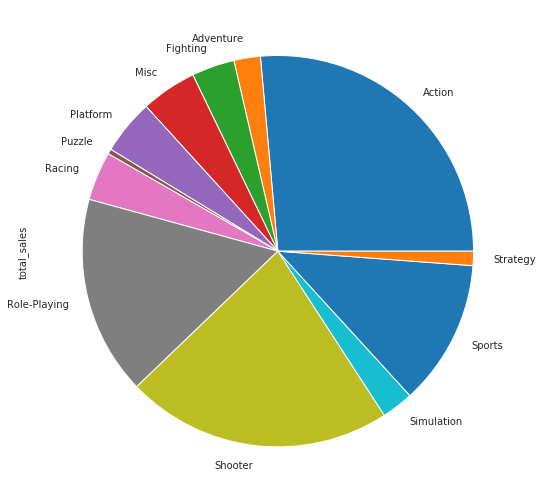

In [70]:
new_consoles.groupby('genre')['total_sales'].sum().plot(kind = 'pie',figsize = (9,9))

Сконцентрироваться стоит на продуктах в жанрах Action, Shooter, Sports, Role-Playing. Вкладывать деньги в прочие направления считаю как минимум опасным занятием.

#### 4. Предпочтение по жанрам и консолям

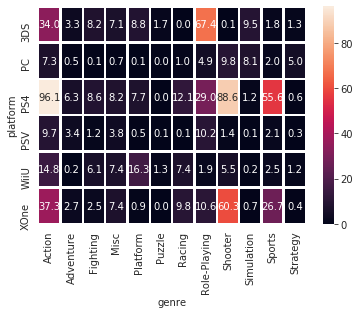

In [71]:
genre_sales = (new_consoles
               .pivot_table(index='platform', columns='genre', values='total_sales', aggfunc=sum)
               .fillna(0)
               .applymap(float))
sns.heatmap(genre_sales, annot=True, fmt=".1f", linewidths=1.5) 

- PS4 - Action, Shooter, Sports , Role-Playing 
- XOne - Shooter, Action, Sports, Role-Playing
- 3DS - Role-Playing, Action

#### 5. Зависимость от рейтинга ESRB

In [72]:
esrb[esrb['esrb_rus'] != 'Данных нет'].groupby('esrb_rus').sum()

,na_sales,eu_sales,jp_sales
esrb_rus,,,
Для взрослых,97.05,94.51,8.17
Для всех,52.37,58.00,13.26
Для всех от 10 лет и старше,32.25,26.30,5.66
Подросткам,35.07,32.60,13.52


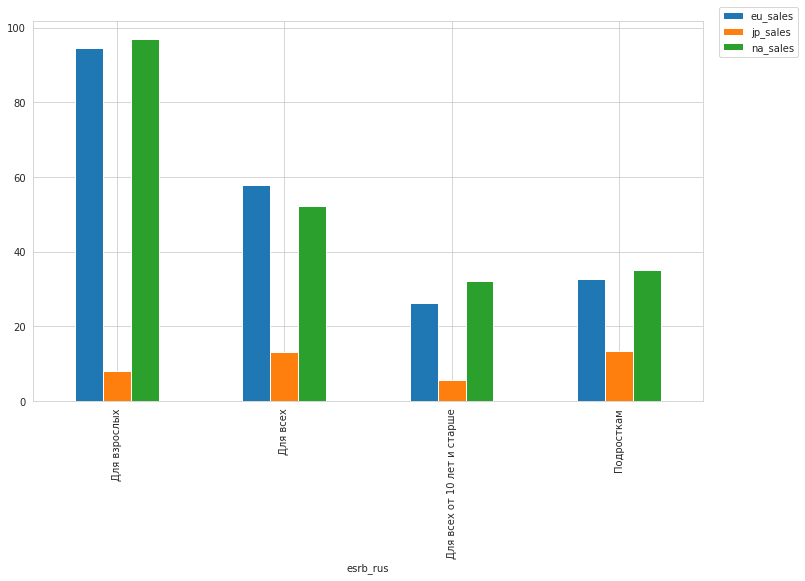

In [73]:
(esrb[esrb['esrb_rus'] != 'Данных нет']
 .pivot_table(index='esrb_rus',values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
 .plot.bar(figsize=(12, 7)))
plt.legend(bbox_to_anchor=(1.15, 1.05))

В данном пункте стоит учитывать, что по распространению отличается только Япония, где сильный перекос в продажах на проекты для Подростков «T» («Teen»), либо не содержащих экстремального насилия. Европейцы и Североамериканцы в основном предпочитают отдавать свои деньги за игры с максимальным рейтингом «M» («Mature») — «Для взрослых» \ «E» («Everyone») — «Для всех» подразумевающие умеренное или высокое содержание насилия. Всвязи с этим наиболее было бы разумно сделать ставку на игры с рейтингом "Для взрослых", ориентированные именно на пользователя Северной Америки и Европы.